In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD,Adagrad
from tensorflow.keras.losses import mean_absolute_error,mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('1.xlsx',sheet_name=1)

In [ ]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [ ]:
train_ind = int(0.72 * x.shape[0])
x_train = x[:train_ind].values
x_test = x[train_ind:].values
y_train = y[:train_ind].values
y_test = y[train_ind:].values
y_train = np.reshape(y_train, newshape=(-1, 1))
y_test = np.reshape(y_test, newshape=(-1, 1))

In [ ]:
# scalers
scaler_x = StandardScaler()
scaler_y = StandardScaler()
# scaling
x_train_sc = scaler_x.fit_transform(x_train)
x_test_sc = scaler_x.transform(x_test)
y_train_sc = scaler_y.fit_transform(y_train)
y_test_sc = scaler_y.transform(y_test)
x_train_sc.shape

(60, 8)

In [ ]:
model = Sequential()
model.add(Dense(units=5, activation='tanh',input_dim=8))
model.add(Dense(units=5, activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(units=5, activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(units=1, activation='linear'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
adagrds = tf.keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(optimizer=adam, loss='mean_absolute_error')

In [ ]:
filepath = 'bestmodel.h5'
checkpoint = ModelCheckpoint(filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
early_stop = EarlyStopping(monitor='val_loss',verbose=1,mode="min",restore_best_weights=True,patience=50)
callback_list = [checkpoint,early_stop]

In [ ]:
hist = model.fit(x_train_sc, y_train_sc,validation_data=(x_test_sc,y_test_sc), epochs=1000,callbacks=callback_list)

Epoch 1/1000
2/2 [==============================] - 4s 389ms/step - loss: 0.9082 - val_loss: 0.8590

Epoch 00001: loss improved from inf to 0.91274, saving model to bestmodel.h5
Epoch 2/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.9264 - val_loss: 0.8531

Epoch 00002: loss improved from 0.91274 to 0.90260, saving model to bestmodel.h5
Epoch 3/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.8891 - val_loss: 0.8455

Epoch 00003: loss improved from 0.90260 to 0.89181, saving model to bestmodel.h5
Epoch 4/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.8996 - val_loss: 0.8368

Epoch 00004: loss improved from 0.89181 to 0.88272, saving model to bestmodel.h5
Epoch 5/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.8934 - val_loss: 0.8289

Epoch 00005: loss improved from 0.88272 to 0.87304, saving model to bestmodel.h5
Epoch 6/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.8461 - val_loss: 0.8212

In [ ]:
ridingModel = load_model('/content/bestmodel.h5')

In [ ]:
train_predict = [scaler_y.inverse_transform(ridingModel.predict(x_train_sc))[i][0] for i in range(y_train_sc.shape[0])]
train_act = [scaler_y.inverse_transform(y_train_sc)[i][0] for i in range(y_train_sc.shape[0])]
test_predict= [scaler_y.inverse_transform(ridingModel.predict(x_test_sc))[i][0] for i in range(y_test_sc.shape[0])]
test_act = [scaler_y.inverse_transform(y_test_sc)[i][0] for i in range(y_test_sc.shape[0])]

In [ ]:
d1 = {"actual train":train_act,
      "predicted traain": train_predict}
d2 = {"actual test": test_act,
      "predicted test":test_predict}
datatrain = pd.DataFrame(data=d1)
datatest= pd.DataFrame(data=d2)


meantrain =[abs(train_act[i]-train_predict[i])/train_act[i] for i in range(len(train_act))]
meantest = x =[abs(test_act[i]-test_predict[i])/test_act[i] for i in range(len(test_act))]

In [ ]:
print(f"mean absolute error for training is {round(np.mean(meantrain)*100,ndigits=1)}%")
print(f"mean absolute error for test is {round(np.mean(meantest)*100,ndigits=1)}%")

mean absolute error for training is 1.0%
mean absolute error for test is 1.4%


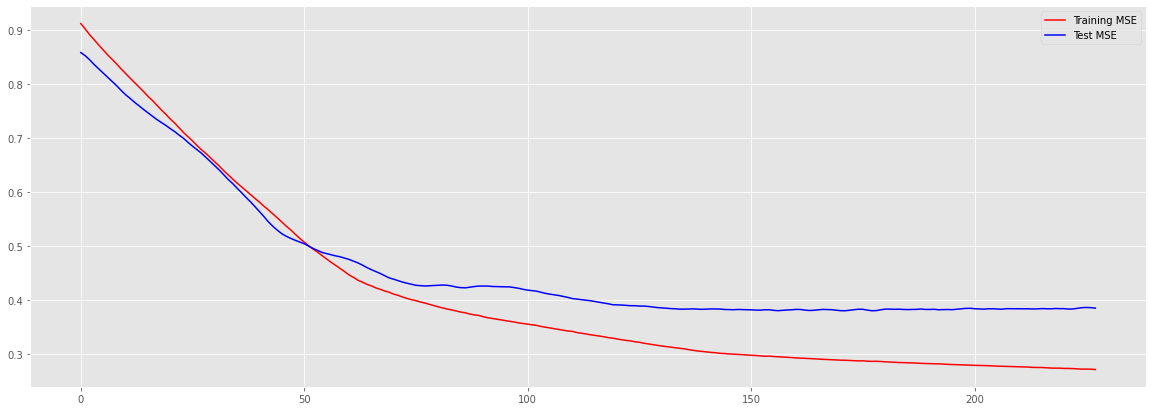

In [ ]:
trainloss = hist.history['loss'] 
testloss = hist.history['val_loss']
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(trainloss,'r-',label='Training MSE')
plt.plot(testloss,'b-',label='Test MSE')

plt.legend()

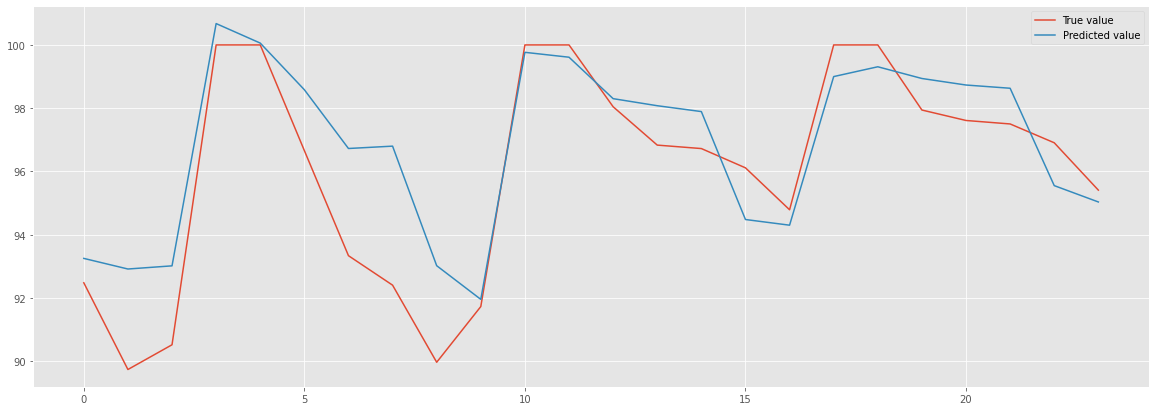

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(test_act, label="True value")
plt.plot(test_predict, label="Predicted value")
plt.legend()

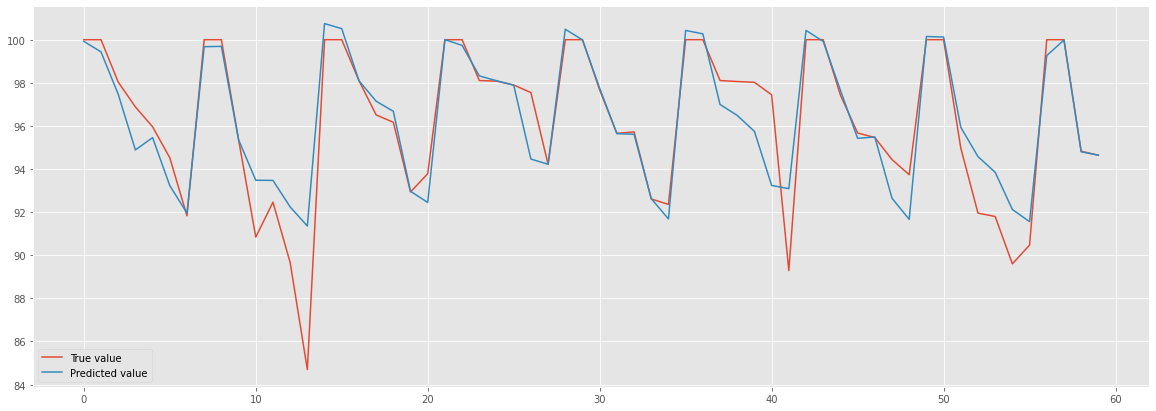

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(train_act, label="True value")
plt.plot(train_predict, label="Predicted value")
plt.legend()